# Proyecto 6: Sistemas de recomendación

## Dataset

El dataset que vamos a usar en este proyecto es el del proyecto [MovieLens](http://grouplens.org/datasets/movielens/). Estos son relevados por el grupo de investigación GroupLens de la Universidad de Minnesota. Vamos a usar la versión 100K.

Está basado en un sistema de rating de 5 estrellas y texto libre para tags a partir del servicio de recomendaciones MovieLens. Contiene 100.000 ratings para 1.682 películas. Los datos fueron creados por 943 usuarios.

En el [Readme](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt) del dataset se puede encontrar información adicional. A continuación vamos a describir cada uno de ellos.

### Ratings (u.data)

Cada línea representa el rating para una película para un usuario. Los ratings están basados en un sistema de 5 estrellas, con una salto de 0.5 estrellas. Los timestamps están expresados en segundos desde la medianoche de 01/1970 (UTC). El formato es:

`user id | item id | rating | timestamp`

### Usuarios (u.users)

Cada línea del archivo representa un usuario. Se incluye información demográfica. El formato es:

`user id | age | gender | occupation | zip code`

### Películas (u.item)

Cada línea corresponde a una película. Puede haber inconsistencias en los nombres. El formato es:

`movie id | movie title | release date | video release date | IMDb URL | generos`



Las columnas con los generos son binarias indicando la presencia o ausencia de cada uno en la película. Los géneros pueden ser:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* unknown

## Experimentación

Durante todo este proyecto vamos a utilizar la librería `surprise` para llevar a cabo las experimentaciones.

Como se mencionó en clase, las implementaciones en esta librería tiene algunas mejoras respecto de las estrategias convencionales como SVD. Esto se traduce en una mayor cantidad de parámetros para optimizar.

Vamos a levantar los datos. En primer lugar, definamos el formato para poder leer los datos.

**1) Utilizar** el `Reader` con el parámetro `line_format` igual a `'user item rating timestamp'` y `sep` como `'\t'`. Guardarlo en una variable `reader`.

In [1]:
import numpy as np
from surprise import Dataset
from surprise import Reader
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
pd.set_option('max_colwidth', None)
import gc #garbage collector

<font color = "green">Se arma un df con los datos</font>

In [2]:
data_cols = ['user id', 'item id', 'rating']
df = pd.read_csv('./dataset/ml-100k/u.data',sep = '\t',names=data_cols,encoding="ISO-8859-1",usecols = [0,1,2])


<font color = "green">cambiamos lo nombres de algunas columnas uniendo palabras por un guion bajo</font>

In [3]:
df = df.rename(columns={'user id':'user_id','item id':'item_id'})

In [4]:
df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


Cantidad de usuarios

In [5]:
len(df['user_id'].unique())

943

Cantidad de películas

In [6]:
len(df['item_id'].unique())

1682

Cantidad de rating

In [7]:
len(df)

100000

porcentaje de datos

In [8]:
100000/(943*1682)*100

6.304669364224531

se puede inferir que se cuenta con solo el 6% de la tabla de ranking

<font color = "green">Se arma un objeto reader con las columnas del df (la consigna dice que el puntaje va de 0 a 5 con saltos de a 0.5 aunque parece ser que el salto es de a 1)</font>


In [9]:
reader = Reader(rating_scale = (1, 5.0))
data=Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

In [10]:
data

__2) Ejecutar una corrida inicial usando cross validation y el algoritmo SVD (5 folds). Imprimir los RMSE de testing.__

In [11]:
from surprise import SVD
model = SVD(n_factors=50)
from surprise.model_selection import train_test_split


In [12]:
from surprise.model_selection import cross_validate
cv = cross_validate(model, data, measures=['RMSE'], cv = 5, verbose=True)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9356  0.9376  0.9358  0.9318  0.9317  0.9345  0.0024  
Fit time          12.51   10.17   9.73    11.11   11.71   11.05   1.01    
Test time         0.56    0.41    0.57    0.55    0.47    0.51    0.06    


para entrenar un modelo con todo el conjunto de datos se puede hacer mediante las sgtes dos lineas

In [13]:
trainset = data.build_full_trainset()

In [14]:
model.fit(trainset)

In [15]:
uid = 196
iid = 242

model.predict(uid, iid, r_ui=3, verbose=True)


user: 196        item: 242        r_ui = 3.00   est = 3.65   {'was_impossible': False}


Prediction(uid=196, iid=242, r_ui=3, est=3.6533850698505392, details={'was_impossible': False})

__3) Evaluar el RMSE (promedio de cross validation) de testing de acuerdo a la cantidad de factores en SVD.__ correr de a 50 hasta llegar a 500

se busca el mejor valor de factores latentes

In [16]:
rmse_test_means = []
factores = [15,30,45,50,55,60,100,150,200,250,300,350,400,450,500]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 5, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

15
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9359  0.9370  0.9324  0.9380  0.9334  0.9353  0.0021  
Fit time          5.38    5.87    5.53    4.98    4.35    5.22    0.52    
Test time         0.45    0.42    0.39    0.30    0.23    0.36    0.08    
30
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9265  0.9305  0.9283  0.9534  0.9380  0.9354  0.0098  
Fit time          3.82    3.31    3.28    3.70    3.33    3.49    0.23    
Test time         0.19    0.28    0.20    0.24    0.19    0.22    0.04    
45
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9399  0.9330  0.9421  0.9260  0.9302  0.9343  0.0060  
Fit time          4.15    4.02    4.00    3.28    3.43    3.78    0.35    
Test time         0

__4) Graficar los promedios RMSE del conjunto de testing de acuerdo a la cantidad de factores en SVD.__

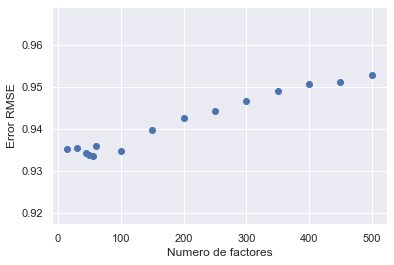

In [17]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

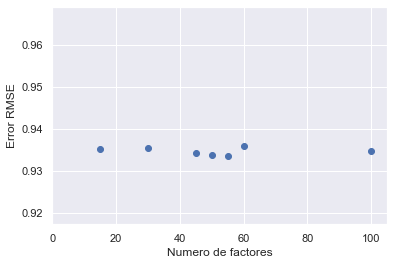

In [18]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.xlim(0, 105)
plt.show()

__5) Usando GridSearch, encontrar el mejor estimador usando SVD con 500 factores. Imprimir el mejor rmse. Utilizar `refit` para obtener obtener el mejor estimador ya ajustado como resultado.__ 


Utilizar el espacio de parámetros:
* n_epochs: [5, 10]
* lr_all: [0.002, 0.005]
* reg_all: [0.4, 0.6]


<font color = "red">__Nota: La consigna dice 500 factores pero se realiza el ejercicio con 50 que es el mejor valor para este hiperparámetro__</font>

In [19]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],'reg_all': [0.4, 0.6],'n_factors':[50]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs = -1,refit = True)


In [20]:
gs.fit(data)


In [21]:
print(gs.best_params['rmse'])

{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4, 'n_factors': 50}


algunas pruebas para ver cómo predice

In [22]:
gs.predict(20,377)

Prediction(uid=20, iid=377, r_ui=None, est=2.664339554846727, details={'was_impossible': False})

In [23]:
df[(df.user_id==22)&(df.item_id==377)]

,user_id,item_id,rating
2,22,377,1


__6) Obtener una predicción para el usuario 321 para la película Titanic.__

In [24]:
movie_cols = ['item_id', 'movie_title']
df_title = pd.read_csv('./dataset/ml-100k/u.item',sep='|',names=movie_cols,encoding="ISO-8859-1",usecols = [0,1])

In [25]:
df_title

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


<font color = "green">Se busca el __item id__ de la película Titanic</font>

In [26]:
df_title[df_title['movie_title']=='Titanic (1997)']

,item_id,movie_title
312,313,Titanic (1997)


In [27]:
print('Puntaje del usuario 321 sobre el film Titanic = ',gs.predict(321,313).est)

Puntaje del usuario 321 sobre el film Titanic =  3.9811169560042563


__7) Desarrollar una función que dado un usuario, obtenga la mejor predicción disponible (de acuerdo a nuestros datos de películas).__

In [28]:
def recomendaciones(ususario):
    #Creamos donde vamos a guardar las recomendaciones
    #Sacamos del dataframe todas las películas que ya sabemos que vio
    #Se imprimen las 5 películas con mejor prediccione de ranking para el usuario
    recomendaciones_usuario = df_title.iloc[:1683].copy()
    usuario_vistas = df[df['user_id'] == ususario]
    recomendaciones_usuario.drop(usuario_vistas['item_id']-1, inplace = True)
    recomendaciones_usuario = recomendaciones_usuario.reset_index()
    recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['item_id'].apply(lambda x: gs.predict(usuario, x).est)
    recomendaciones_usuario.sort_values('Estimate_Score',ascending=False,inplace=True)
    recomendaciones_usuario = recomendaciones_usuario.reset_index()
  
    print('\033[1m' +'Películas recomendadas a usuario: '+ str(usuario) +'\033[0m'+'\n')    
    for i in range(5): print(recomendaciones_usuario['movie_title'][i])

algunas pruebas:

In [29]:
usuario=6
recomendaciones(usuario)


Películas recomendadas a usuario: 6

Wallace & Gromit: The Best of Aardman Animation (1996)
Rear Window (1954)
Manchurian Candidate, The (1962)
Shall We Dance? (1996)
Titanic (1997)


In [30]:
usuario=2
recomendaciones(usuario)


Películas recomendadas a usuario: 2

Close Shave, A (1995)
Wrong Trousers, The (1993)
Schindler's List (1993)
Shawshank Redemption, The (1994)
Wallace & Gromit: The Best of Aardman Animation (1996)


In [31]:
usuario=10
recomendaciones(usuario)


Películas recomendadas a usuario: 10

Close Shave, A (1995)
Wrong Trousers, The (1993)
Schindler's List (1993)
Wallace & Gromit: The Best of Aardman Animation (1996)
Good Will Hunting (1997)


In [32]:
usuario=11
recomendaciones(usuario)

Películas recomendadas a usuario: 11

Close Shave, A (1995)
Wrong Trousers, The (1993)
Shawshank Redemption, The (1994)
Wallace & Gromit: The Best of Aardman Animation (1996)
Casablanca (1942)


Conclusión: Al contar solo con un 6% de datos el modelo predice casi siempre el mismo orden de películas en el de ranking para 
cualuier usuario. Es por esto que casi siempre propondrá las mismas películas exceptuando aquellas ya vistas 

Podemos evaluar nuestro sistemas de recomendación fijandonos en la lista de peliculas mejores puntuadas por el usuario

In [33]:
usuario =11
rating = 4  # le pedimos peliculas a las que haya puesto 4 o 5 estrellas
df_user = df[(df['user_id'] == usuario) & (df['rating'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user['Name'] = df_title['movie_title'].loc[df_user['item_id']-1].values ###se tiene que restar df_user['item_id']-1
df_user

,user_id,item_id,rating,Name
0,11,111,4,"Truth About Cats & Dogs, The (1996)"
1,11,425,4,Bob Roberts (1992)
2,11,740,4,Jane Eyre (1996)
3,11,723,5,Boys on the Side (1995)
4,11,741,5,"Last Supper, The (1995)"
...,...,...,...,...
81,11,173,5,"Princess Bride, The (1987)"
82,11,393,4,Mrs. Doubtfire (1993)
83,11,239,4,Sneakers (1992)
84,11,107,4,Moll Flanders (1996)


In [ ]:
2+2